In [1]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd
import numpy as np
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'C:\utda\CreditOneClean.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [3]:
import csv
with open('CreditOneClean.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    rows = list(csv_reader)
    print(rows[1])

['1', '20000', 'female', 'university', '1', '24', '2', '2', '-1', '-1', '-2', '-2', '3913', '3102', '689', '0', '0', '0', '0', '689', '0', '0', '0', '0', 'default']


In [4]:
data.dtypes

ID                             int64
LIMIT_BAL                      int64
SEX                           object
EDUCATION                     object
MARRIAGE                       int64
AGE                            int64
PAY_0                          int64
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month    object
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

# Pre-processing the data

In [6]:
data['PAY_0']=data['PAY_0'].astype('category')
data['PAY_2']=data['PAY_2'].astype('category')
data['PAY_3']=data['PAY_3'].astype('category')
data['PAY_4']=data['PAY_4'].astype('category')
data['PAY_5']=data['PAY_5'].astype('category')
data['PAY_6']=data['PAY_6'].astype('category')
data['SEX']=data['SEX'].astype('category')
data['MARRIAGE']=data['MARRIAGE'].astype('category')
data['EDUCATION']=data['EDUCATION'].astype('category')
data['default payment next month']=data['default payment next month'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          30000 non-null  int64   
 1   LIMIT_BAL                   30000 non-null  int64   
 2   SEX                         30000 non-null  category
 3   EDUCATION                   30000 non-null  category
 4   MARRIAGE                    30000 non-null  category
 5   AGE                         30000 non-null  int64   
 6   PAY_0                       30000 non-null  category
 7   PAY_2                       30000 non-null  category
 8   PAY_3                       30000 non-null  category
 9   PAY_4                       30000 non-null  category
 10  PAY_5                       30000 non-null  category
 11  PAY_6                       30000 non-null  category
 12  BILL_AMT1                   30000 non-null  int64   
 13  BILL_AMT2       

In [7]:
#loc is label based
X=data.loc[:,['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
X.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [8]:
# first problem: we have to scale down the different magnitudes and units in the feautures
# using Standardization for the feautures in X, rescaling
# features rescaled will be transformed in such a way that it will have the properties of astandard normal distribution with mean=0 and standard deviation=1
# features need to be scaled down when using KNN, linear regression etc. Not necessarily when using decision trees, random forest, or GradientBooster/other boosting techniques
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()

#transform: fit to data, then transform the specified rows in X, rescaling the specified labels
rescaleX = scaling.fit_transform(X)
print(rescaleX[0:5,:])

[[-1.13672015 -1.24601985 -0.64250107 -0.64739923 -0.66799331 -0.67249727
  -0.66305853 -0.65272422 -0.34194162 -0.22708564 -0.29680127 -0.30806256
  -0.31413612 -0.29338206]
 [-0.3659805  -1.02904717 -0.65921875 -0.66674657 -0.63925429 -0.62163594
  -0.60622927 -0.59796638 -0.34194162 -0.21358766 -0.24000461 -0.24422965
  -0.31413612 -0.18087821]
 [-0.59720239 -0.16115646 -0.29855966 -0.49389911 -0.48240819 -0.44973025
  -0.41718767 -0.39162956 -0.25029158 -0.19188673 -0.24000461 -0.24422965
  -0.24868274 -0.01212243]
 [-0.90549825  0.16430256 -0.05749103 -0.01329269  0.03284648 -0.23237268
  -0.18672897 -0.15657889 -0.22119058 -0.16936116 -0.22864528 -0.23784635
  -0.24416646 -0.23713013]
 [-0.90549825  2.33402934 -0.57861809 -0.61131792 -0.16118875 -0.3469972
  -0.34813724 -0.33148158 -0.22119058  1.33503416  0.27116536  0.26643369
  -0.26903874 -0.255187  ]]


In [9]:
#write to dataset

dataScaled=pd.DataFrame(rescaleX)
dataScaled.columns = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
dataScaled.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [10]:
#one-hot encoding
data = pd.get_dummies(data,drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 81 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   ID                                      30000 non-null  int64
 1   LIMIT_BAL                               30000 non-null  int64
 2   AGE                                     30000 non-null  int64
 3   BILL_AMT1                               30000 non-null  int64
 4   BILL_AMT2                               30000 non-null  int64
 5   BILL_AMT3                               30000 non-null  int64
 6   BILL_AMT4                               30000 non-null  int64
 7   BILL_AMT5                               30000 non-null  int64
 8   BILL_AMT6                               30000 non-null  int64
 9   PAY_AMT1                                30000 non-null  int64
 10  PAY_AMT2                                30000 non-null  int64
 11  PAY_AMT3       

In [11]:
data2 =data.drop(['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'], axis=1,)
data2.head()

,ID,SEX_male,EDUCATION_high school,EDUCATION_other,EDUCATION_university,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-1,PAY_0_0,...,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default payment next month_not default
0,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,3,0,0,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,4,0,0,0,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,5,1,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [12]:
credit = pd.concat([dataScaled, data2], axis=1)
credit.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default payment next month_not default
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,...,0,0,0,0,0,0,0,0,0,0
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,...,0,0,1,0,0,0,0,0,0,0
2,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,...,0,1,0,0,0,0,0,0,0,1
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,...,0,1,0,0,0,0,0,0,0,1
4,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,...,0,1,0,0,0,0,0,0,0,1


In [13]:
Y = credit['default payment next month_not default'].values
X1 = credit.drop('default payment next month_not default', axis=1).values

In [14]:
print(Y)

[0 0 1 ... 0 0 0]


In [15]:
model = LinearRegression()
print(cross_val_score(model, X, Y, cv=3))

[0.02043894 0.03529045 0.0280483 ]


In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(solver='lbfgs', max_iter=1000)
rfe = RFE(model2)
rfeModel = rfe.fit(X, Y)
print("Num Features: %d" % rfeModel.n_features_)
print("Selected Features: %s" % rfeModel.support_)
print("Feature Ranking: %s" % rfeModel.ranking_)

Num Features: 7
Selected Features: [False  True  True  True False False False False  True  True  True  True
 False False]
Feature Ranking: [4 1 1 1 6 8 3 7 1 1 1 1 2 5]


In [17]:
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [18]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,Y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [19]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.08287356455049362
Linear Regression 0.027925895044171572
Support Vector Regression -0.0851223288801215


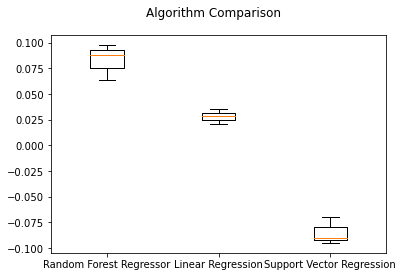

In [20]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [21]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 81 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   LIMIT_BAL                               30000 non-null  float64
 1   AGE                                     30000 non-null  float64
 2   BILL_AMT1                               30000 non-null  float64
 3   BILL_AMT2                               30000 non-null  float64
 4   BILL_AMT3                               30000 non-null  float64
 5   BILL_AMT4                               30000 non-null  float64
 6   BILL_AMT5                               30000 non-null  float64
 7   BILL_AMT6                               30000 non-null  float64
 8   PAY_AMT1                                30000 non-null  float64
 9   PAY_AMT2                                30000 non-null  float64
 10  PAY_AMT3                                30000 non-null  fl

# Model

In [22]:
data3=credit.iloc[:,[0,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,37,38,39,40,45,46,48,49,50,54,55,57,58,59,61,64,66,69,71,72,74,77,79]]
data3.head()

,LIMIT_BAL,EDUCATION_high school,EDUCATION_other,EDUCATION_university,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-1,PAY_0_0,PAY_0_1,...,PAY_4_6,PAY_4_8,PAY_5_2,PAY_5_4,PAY_5_7,PAY_6_-1,PAY_6_0,PAY_6_3,PAY_6_6,PAY_6_8
0,-1.136720,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.365981,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.597202,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,-0.905498,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-0.905498,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LIMIT_BAL              30000 non-null  float64
 1   EDUCATION_high school  30000 non-null  uint8  
 2   EDUCATION_other        30000 non-null  uint8  
 3   EDUCATION_university   30000 non-null  uint8  
 4   MARRIAGE_1             30000 non-null  uint8  
 5   MARRIAGE_2             30000 non-null  uint8  
 6   MARRIAGE_3             30000 non-null  uint8  
 7   PAY_0_-1               30000 non-null  uint8  
 8   PAY_0_0                30000 non-null  uint8  
 9   PAY_0_1                30000 non-null  uint8  
 10  PAY_0_2                30000 non-null  uint8  
 11  PAY_0_3                30000 non-null  uint8  
 12  PAY_0_4                30000 non-null  uint8  
 13  PAY_0_5                30000 non-null  uint8  
 14  PAY_0_6                30000 non-null  uint8  
 15  PA

In [24]:
X2 = data3.values
Y = credit['default payment next month_not default'].values

In [25]:
#train split
X_train, X_test, y_train, y_test = train_test_split(X2,Y,test_size=0.25,random_state=123)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
targetModels = []
targetModels.append(('KNN', KNeighborsClassifier()))
targetModels.append(('NB', GaussianNB()))
targetModels.append(('CART', DecisionTreeClassifier()))
targetModels.append(('SVM', SVC()))
targetModels.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))

In [27]:
from sklearn.model_selection import StratifiedKFold
scoring = 'accuracy'
resultsA = []
namesA = []
for name, model in targetModels:
    kfold = StratifiedKFold(n_splits=10)
    cvResults = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    resultsA.append(cvResults)
    namesA.append(name)
    msg = "%s: %f (%f)" % (name, cvResults.mean(), cvResults.std())
    print(msg)

KNN: 0.797156 (0.007780)
NB: 0.787733 (0.004065)
CART: 0.776044 (0.008932)
SVM: 0.820578 (0.005476)
LR: 0.819111 (0.005202)


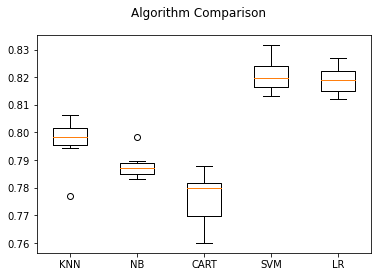

In [28]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(resultsA)
ax.set_xticklabels(namesA)
plt.show()

In [29]:
scoring = 'r2'
resultsB = []
namesB = []
for name, model in targetModels:
    kfold = StratifiedKFold(n_splits=10, random_state=123, shuffle=True)
    cvResults2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    resultsB.append(cvResults2)
    namesB.append(name)
    msg = "%s: %f (%f)" % (name, cvResults2.mean(), cvResults2.std())
    print(msg)

KNN: -0.182885 (0.033970)
NB: -0.226794 (0.028580)
CART: -0.284834 (0.020207)
SVM: -0.035980 (0.020368)
LR: -0.043942 (0.020139)


In [30]:
scoring = 'r2'
resultsC = []
namesC = []
for name, model in targetModels:
    kfold = StratifiedKFold(n_splits=10)
    cvResults3 = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    resultsB.append(cvResults3)
    namesB.append(name)
    msg = "%s: %f (%f)" % (name, cvResults3.mean(), cvResults3.std())
    print(msg)

KNN: -0.172111 (0.045430)
NB: -0.226542 (0.023633)
CART: -0.301285 (0.052376)
SVM: -0.036757 (0.031755)
LR: -0.045233 (0.030202)


# Improve with Ensembles

In [31]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
treesNum = 100
maxFeatures = 10
kfold = StratifiedKFold(n_splits=10)
model3 = RandomForestClassifier(n_estimators=treesNum, max_features=maxFeatures)
results = cross_val_score(model3,X_train, y_train, cv=kfold)
print(results.mean())

0.7938666666666667


In [32]:
# Stochastic Gradient Boosting Classification
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(n_estimators=treesNum, random_state=123)
results2 = cross_val_score(model4, X_train, y_train, cv=kfold)
print(results2.mean())

0.8200888888888889


In [33]:
# Extra Trees Classification
from sklearn.ensemble import ExtraTreesClassifier
model5 = ExtraTreesClassifier(n_estimators=treesNum, max_features=maxFeatures)
results3 = cross_val_score(model5, X_train, y_train, cv=kfold)
print(results3.mean())

0.7823555555555555


In [34]:
# AdaBoosting Classifier
from sklearn.ensemble import AdaBoostClassifier
model6 = AdaBoostClassifier(n_estimators=treesNum, random_state=123)
results4 = cross_val_score(model6, X_train, y_train, cv=kfold)
print(results4.mean())

0.8192


In [35]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier
model7 = VotingClassifier(estimators = targetModels, voting ='hard')
results5 = cross_val_score(model7, X_train, y_train, cv=kfold)
print(results5.mean())

0.8166666666666667


In [36]:
# Bagging meta-estimator
# This takes really long ~20 minute test
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
model8 = BaggingClassifier(KNeighborsClassifier(), n_estimators = treesNum, max_features=maxFeatures)
results6 = cross_val_score(model8, X_train, y_train, cv=kfold)
print(results6.mean())

0.7919111111111111


# Model Tuning

In [37]:
# Stochastic Gradient Boosting Classification tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]),learning_rate=np.array([0.001, 0.01, 0.1]))
model9 = GradientBoostingClassifier(random_state=123)
kfold = StratifiedKFold(n_splits=10)
scoring = 'accuracy'
gbm_cv = GridSearchCV(estimator=model9, param_grid=param_grid, scoring=scoring, cv=kfold)
gbmresult = gbm_cv.fit(X_train, y_train)
print("Best: %f using %s" % (gbmresult.best_score_, gbmresult.best_params_))
means = gbmresult.cv_results_['mean_test_score']
stds = gbmresult.cv_results_['std_test_score']
params = gbmresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.820267 using {'learning_rate': 0.1, 'n_estimators': 150}
0.777378 (0.000133) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.777378 (0.000133) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.777378 (0.000133) with: {'learning_rate': 0.001, 'n_estimators': 150}
0.777378 (0.000133) with: {'learning_rate': 0.001, 'n_estimators': 200}
0.777378 (0.000133) with: {'learning_rate': 0.001, 'n_estimators': 250}
0.777378 (0.000133) with: {'learning_rate': 0.001, 'n_estimators': 300}
0.777378 (0.000133) with: {'learning_rate': 0.001, 'n_estimators': 350}
0.777378 (0.000133) with: {'learning_rate': 0.001, 'n_estimators': 400}
0.777378 (0.000133) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.815244 (0.005913) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.817156 (0.006117) with: {'learning_rate': 0.01, 'n_estimators': 150}
0.818267 (0.007135) with: {'learning_rate': 0.01, 'n_estimators': 200}
0.819156 (0.005560) with: {'learning_rate': 0.01, 'n_estimators': 250}
0.8195

[5.86418528e-02 1.95942763e-03 5.39738960e-03 2.01558511e-03
 4.61703546e-03 2.16600439e-03 1.59931777e-03 7.37967805e-04
 4.12005549e-02 4.88999518e-02 5.19390508e-01 4.36571798e-02
 5.52158990e-03 6.74957957e-04 0.00000000e+00 7.02338754e-05
 4.87380762e-05 1.81766856e-02 5.39210547e-04 1.32119902e-03
 1.42655933e-03 3.08724806e-03 7.48884011e-04 1.12608619e-01
 4.28351529e-03 0.00000000e+00 1.75335438e-03 2.30430646e-04
 1.61693681e-04 4.07111495e-02 3.43874453e-03 6.22918236e-04
 3.55231479e-04 5.67472695e-07 4.75716953e-02 2.11321908e-04
 1.86037076e-03 7.37794082e-03 1.06801564e-02 5.02327719e-03
 8.79685378e-04 3.31246653e-04]


Text(0, 0.5, 'Feature Importance Score')

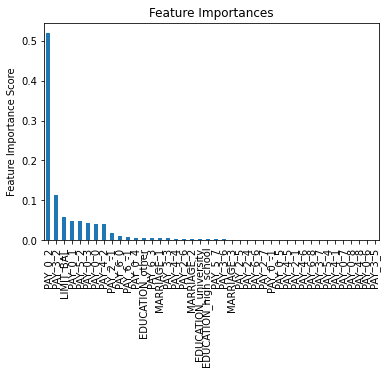

In [38]:
# Feature Importance
print(gbm_cv.best_estimator_.feature_importances_)
featImp = pd.Series(gbm_cv.best_estimator_.feature_importances_,data3.columns).sort_values(ascending=False)
featImp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [39]:
# LogisticRegression Algorithm tuning with GridSearchCV
model10 = LogisticRegression(solver='lbfgs', max_iter=1000)
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
logreg_cv = GridSearchCV(estimator=model10, param_grid=param_grid, scoring=scoring, cv=kfold)
logresult=logreg_cv.fit(X_train, y_train)
print("Best: %f using %s" % (logresult.best_score_, logresult.best_params_))
means = logresult.cv_results_['mean_test_score']
stds = logresult.cv_results_['std_test_score']
params = logresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.819333 using {'C': 11787686.347935867}
0.777378 (0.000133) with: {'C': 1e-05}
0.777378 (0.000133) with: {'C': 8.483428982440725e-05}
0.786667 (0.002689) with: {'C': 0.0007196856730011522}
0.811422 (0.003338) with: {'C': 0.006105402296585327}
0.818044 (0.004459) with: {'C': 0.05179474679231213}
0.819022 (0.004904) with: {'C': 0.4393970560760795}
0.819289 (0.004946) with: {'C': 3.727593720314938}
0.819200 (0.004848) with: {'C': 31.622776601683793}
0.819244 (0.004973) with: {'C': 268.2695795279727}
0.819244 (0.004973) with: {'C': 2275.845926074791}
0.819289 (0.004990) with: {'C': 19306.977288832535}
0.819244 (0.004973) with: {'C': 163789.3706954068}
0.819289 (0.004966) with: {'C': 1389495.494373136}
0.819333 (0.004982) with: {'C': 11787686.347935867}
0.819289 (0.004990) with: {'C': 100000000.0}


In [40]:
# DecisionTreeClassifier Algorithm tuning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
kfold = StratifiedKFold(n_splits=10)
param_dist = {"max_depth": [3,5,7],
              "max_features": [3,5,7,9],
              "min_samples_leaf": [30,50,100],
              "criterion": ["gini", "entropy"]}
model11 = DecisionTreeClassifier()
tree_cv =RandomizedSearchCV(model11, param_dist, cv=kfold)
# fit
treeresult=tree_cv.fit(X_train, y_train)
print("Best: %f using %s" % (treeresult.best_score_, treeresult.best_params_))
means = treeresult.cv_results_['mean_test_score']
stds = treeresult.cv_results_['std_test_score']
params = treeresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.809956 using {'min_samples_leaf': 50, 'max_features': 5, 'max_depth': 7, 'criterion': 'entropy'}
0.792133 (0.011809) with: {'min_samples_leaf': 50, 'max_features': 3, 'max_depth': 7, 'criterion': 'entropy'}
0.794711 (0.010996) with: {'min_samples_leaf': 50, 'max_features': 5, 'max_depth': 3, 'criterion': 'entropy'}
0.800667 (0.012489) with: {'min_samples_leaf': 30, 'max_features': 7, 'max_depth': 5, 'criterion': 'entropy'}
0.788978 (0.007957) with: {'min_samples_leaf': 50, 'max_features': 5, 'max_depth': 3, 'criterion': 'gini'}
0.797689 (0.015166) with: {'min_samples_leaf': 100, 'max_features': 5, 'max_depth': 5, 'criterion': 'entropy'}
0.797467 (0.012376) with: {'min_samples_leaf': 100, 'max_features': 7, 'max_depth': 3, 'criterion': 'gini'}
0.808133 (0.006143) with: {'min_samples_leaf': 50, 'max_features': 7, 'max_depth': 5, 'criterion': 'gini'}
0.804222 (0.010555) with: {'min_samples_leaf': 50, 'max_features': 7, 'max_depth': 5, 'criterion': 'entropy'}
0.809956 (0.005308) wi

In [41]:
# KNN Algorithm tuning with GridSearchCV
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model12 = KNeighborsClassifier()
kfold = StratifiedKFold(n_splits=10)
knn_cv= GridSearchCV(estimator=model12, param_grid=param_grid, scoring=scoring, cv=kfold)
#fit
knnresult = knn_cv.fit(X_train, y_train)
print("Best: %f using %s" % (knnresult.best_score_, knnresult.best_params_))
means = knnresult.cv_results_['mean_test_score']
stds = knnresult.cv_results_['std_test_score']
params = knnresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.814444 using {'n_neighbors': 19}
0.722578 (0.014096) with: {'n_neighbors': 1}
0.778133 (0.009614) with: {'n_neighbors': 3}
0.797156 (0.007780) with: {'n_neighbors': 5}
0.803911 (0.009003) with: {'n_neighbors': 7}
0.808800 (0.007731) with: {'n_neighbors': 9}
0.810844 (0.006782) with: {'n_neighbors': 11}
0.811422 (0.006837) with: {'n_neighbors': 13}
0.813111 (0.005803) with: {'n_neighbors': 15}
0.813778 (0.005657) with: {'n_neighbors': 17}
0.814444 (0.005401) with: {'n_neighbors': 19}
0.813733 (0.005173) with: {'n_neighbors': 21}


In [42]:
# SVM Algorithm tuning with GridSearchCV

# Specify the hyperparameter space
param_grid = {'C':[1, 10, 100],
              'gamma':[0.1, 0.01]}
model13 =SVC()
svc_cv= GridSearchCV(estimator=model13, param_grid=param_grid, scoring=scoring, cv=kfold)
svcresult = svc_cv.fit(X_train, y_train)
print("Best: %f using %s" % (svcresult.best_score_, svcresult.best_params_))
means = svcresult.cv_results_['mean_test_score']
stds = svcresult.cv_results_['std_test_score']
params = svcresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.820711 using {'C': 10, 'gamma': 0.1}
0.819244 (0.004520) with: {'C': 1, 'gamma': 0.1}
0.817511 (0.006352) with: {'C': 1, 'gamma': 0.01}
0.820711 (0.005980) with: {'C': 10, 'gamma': 0.1}
0.818311 (0.006106) with: {'C': 10, 'gamma': 0.01}
0.817689 (0.006534) with: {'C': 100, 'gamma': 0.1}
0.818000 (0.005448) with: {'C': 100, 'gamma': 0.01}


In [43]:
# Random Forest Classification tuning with GridSearchCV
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]),max_features=np.array([3,5,7,9,10]))
model14 = RandomForestClassifier()
rf_cv = GridSearchCV(estimator=model14, param_grid=param_grid, scoring=scoring, cv=kfold)
rfresult = rf_cv.fit(X_train, y_train)
print("Best: %f using %s" % (rfresult.best_score_, rfresult.best_params_))
means = rfresult.cv_results_['mean_test_score']
stds = rfresult.cv_results_['std_test_score']
params = rfresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.795022 using {'max_features': 10, 'n_estimators': 250}
0.792533 (0.008645) with: {'max_features': 3, 'n_estimators': 50}
0.793778 (0.006937) with: {'max_features': 3, 'n_estimators': 100}
0.793156 (0.008225) with: {'max_features': 3, 'n_estimators': 150}
0.793467 (0.006471) with: {'max_features': 3, 'n_estimators': 200}
0.792444 (0.007402) with: {'max_features': 3, 'n_estimators': 250}
0.794222 (0.007708) with: {'max_features': 3, 'n_estimators': 300}
0.792622 (0.007619) with: {'max_features': 3, 'n_estimators': 350}
0.792489 (0.006582) with: {'max_features': 3, 'n_estimators': 400}
0.792178 (0.006289) with: {'max_features': 5, 'n_estimators': 50}
0.792044 (0.006889) with: {'max_features': 5, 'n_estimators': 100}
0.793467 (0.007418) with: {'max_features': 5, 'n_estimators': 150}
0.793244 (0.008088) with: {'max_features': 5, 'n_estimators': 200}
0.793600 (0.007266) with: {'max_features': 5, 'n_estimators': 250}
0.793556 (0.006920) with: {'max_features': 5, 'n_estimators': 300}
0

# Evaluate Model

In [44]:
# Predict the labels of the test: predict using Gradient Boosting Classification model
from sklearn.metrics import classification_report
predGBM = gbm_cv.predict(X_test)
print(predGBM)

print("Accuracy: {}".format(gbm_cv.score(X_test, y_test)))
print(classification_report(y_test, predGBM))
print("Tuned Model Parameters: {}".format(gbm_cv.best_params_))

[1 1 0 ... 1 0 1]
Accuracy: 0.8216
              precision    recall  f1-score   support

           0       0.66      0.37      0.47      1627
           1       0.84      0.95      0.89      5873

    accuracy                           0.82      7500
   macro avg       0.75      0.66      0.68      7500
weighted avg       0.80      0.82      0.80      7500

Tuned Model Parameters: {'learning_rate': 0.1, 'n_estimators': 150}


In [45]:
# Predict the labels of the test: predict using LogisticRegression
predLR = logreg_cv.predict(X_test)

print("Accuracy: {}".format(logreg_cv.score(X_test, y_test)))
print(classification_report(y_test, predLR))
print("Tuned Model Parameters: {}".format(logreg_cv.best_params_))

Accuracy: 0.8209333333333333
              precision    recall  f1-score   support

           0       0.66      0.36      0.47      1627
           1       0.84      0.95      0.89      5873

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500

Tuned Model Parameters: {'C': 11787686.347935867}


In [46]:
# Predict the labels of the test: predict using KNN
predKNN = knn_cv.predict(X_test)

print("Accuracy: {}".format(knn_cv.score(X_test, y_test)))
print(classification_report(y_test, predKNN))
print("Tuned Model Parameters: {}".format(knn_cv.best_params_))

Accuracy: 0.8158666666666666
              precision    recall  f1-score   support

           0       0.64      0.35      0.45      1627
           1       0.84      0.95      0.89      5873

    accuracy                           0.82      7500
   macro avg       0.74      0.65      0.67      7500
weighted avg       0.80      0.82      0.79      7500

Tuned Model Parameters: {'n_neighbors': 19}


In [47]:
# Predict the labels of the test set: y_pred using SVM
predSVM = svc_cv.predict(X_test)
# Compute and print metrics
print("Accuracy: {}".format(svc_cv.score(X_test, y_test)))
print(classification_report(y_test, predSVM))
print("Tuned Model Parameters: {}".format(svc_cv.best_params_))

Accuracy: 0.8222666666666667
              precision    recall  f1-score   support

           0       0.66      0.37      0.47      1627
           1       0.84      0.95      0.89      5873

    accuracy                           0.82      7500
   macro avg       0.75      0.66      0.68      7500
weighted avg       0.80      0.82      0.80      7500

Tuned Model Parameters: {'C': 10, 'gamma': 0.1}


In [48]:
# Predict the labels of the test set: y_pred using Random Forest
predRF = rf_cv.predict(X_test)
# Compute and print metrics
print("Accuracy: {}".format(rf_cv.score(X_test, y_test)))
print(classification_report(y_test, predRF))
print("Tuned Model Parameters: {}".format(rf_cv.best_params_))

Accuracy: 0.7909333333333334
              precision    recall  f1-score   support

           0       0.53      0.37      0.43      1627
           1       0.84      0.91      0.87      5873

    accuracy                           0.79      7500
   macro avg       0.68      0.64      0.65      7500
weighted avg       0.77      0.79      0.78      7500

Tuned Model Parameters: {'max_features': 10, 'n_estimators': 250}


# R2 Scoring Evaluation

In [49]:
from math import sqrt

In [50]:
rmse = sqrt(mean_squared_error(y_test, predGBM))
print('RMSE is: %.3f' % (rmse))

RMSE is: 0.422


In [52]:
algo = SVR()
model = algo.fit(X_train, y_train)
predX1 = model.predict(X_test)

In [53]:
print('R2 is: %.3f' % r2_score(y_test, predX1))

R2 is: 0.126


In [54]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,Y,test_size=0.25,random_state=123)

In [55]:
algo1 = LinearRegression()
model1 = algo1.fit(X_train1, y_train1)

In [56]:
predictions = model1.predict(X_test1)

In [57]:
print('R2 is: %.3f' % r2_score(y_test1, predictions))

R2 is: 0.033


In [58]:
rmse = sqrt(mean_squared_error(y_test1, predictions))
print('RMSE is: %.3f' % (rmse))

RMSE is: 0.405


In [60]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X1,Y,test_size=0.25,random_state=123)

In [61]:
algo2 = RandomForestRegressor()
model2 = algo2.fit(X_train2, y_train2)
pred2 = model2.predict(X_test2)

In [62]:
print('R2 is: %.3f' % r2_score(y_test2, pred2))
rmse1 = sqrt(mean_squared_error(y_test2, pred2))
print('RMSE is: %.3f' % (rmse1))

R2 is: 0.193
RMSE is: 0.370


In [64]:
model = LinearRegression()
print(cross_val_score(model, X1, Y, cv=3))

[0.16650973 0.2154625  0.21739838]


In [65]:
print('R2 is: %.3f' % r2_score(y_test, predSVM))
rmseX = sqrt(mean_squared_error(y_test, predSVM))
print('RMSE is: %.3f' % (rmseX))

R2 is: -0.046
RMSE is: 0.422
